# Подготовка данных для обучения нейронных сетей

0. Работа с файлами
1. Работа с Dataset изображений.
2. Работа с Dataset аудио.
3. Использование DataLoader

## 0. Работа с файлами

### Работа с изображениями

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torchvision
from torchvision import transforms

In [3]:
# %%time
cat_tensor = torchvision.io.read_image(path='./cat.jpg')

### Альтернативы для чтения изображений

In [ ]:
# pip install pillow

In [7]:
import PIL
cat_tensor_pil = PIL.Image.open('./cat.jpg')
cat_tensor_pil_np = np.array(cat_tensor_pil)

In [8]:
cat_tensor_pil_np.shape

(360, 543, 3)

In [9]:
type(cat_tensor_pil), cat_tensor_pil.convert("RGB")

(PIL.JpegImagePlugin.JpegImageFile,
 <PIL.Image.Image image mode=RGB size=543x360>)

In [10]:
# pip install pillow

In [11]:
# pip install opencv-python
import cv2
cat_tensor_cv = cv2.imread('./cat.jpg')

In [12]:
# pip install scikit-image
import skimage
cat_tensor_ski = skimage.io.imread('./cat.jpg')

In [13]:
print(f'Формы тензоров, типы данных \
      \n Torchvision: {cat_tensor.shape}, {cat_tensor.dtype} \
      \n OpenCV: {cat_tensor_cv.shape}, {cat_tensor_cv.dtype} \
      \n SciKitImage: {cat_tensor_ski.shape}, {cat_tensor_ski.dtype} \
      \n PythonImagingLibrary to numpy: {cat_tensor_pil_np.shape}, {cat_tensor_pil_np.dtype}')

Формы тензоров, типы данных       
 Torchvision: torch.Size([3, 360, 543]), torch.uint8       
 OpenCV: (360, 543, 3), uint8       
 SciKitImage: (360, 543, 3), uint8       
 PythonImagingLibrary to numpy: (360, 543, 3), uint8


In [14]:
some_tensor = torchvision.io.read_image(
    path='../vae_experiments/imagenet100/train.X1/n01582220/n01582220_91.JPEG')

### Описание тензора

In [17]:
def tensor_info(tensor):
    print(f'Размер тензора: {tensor.shape}')
    print(f'Тип данных элементов тензора: {tensor.dtype}')
    print(f'Максимальный элемент: {tensor.max()}')
    print(f'Минимальный элемент: {tensor.min()}')
    print(f'Тип данных тензора: {type(tensor)}')

In [18]:
tensor_info(cat_tensor)

Размер тензора: torch.Size([3, 360, 543])
Тип данных элементов тензора: torch.uint8
Максимальный элемент: 255
Минимальный элемент: 0
Тип данных тензора: <class 'torch.Tensor'>


In [19]:
cat_tensor.shape        # (CHW)

torch.Size([3, 360, 543])

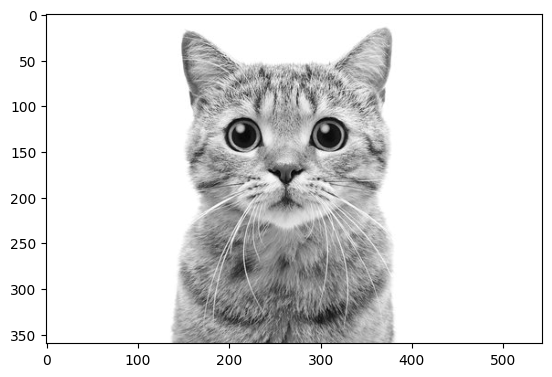

In [23]:
plt.imshow(cat_tensor[1], cmap='gray')

In [24]:
cat_tensor.permute(1, 2, 0).shape   # (HWC)

torch.Size([360, 543, 3])

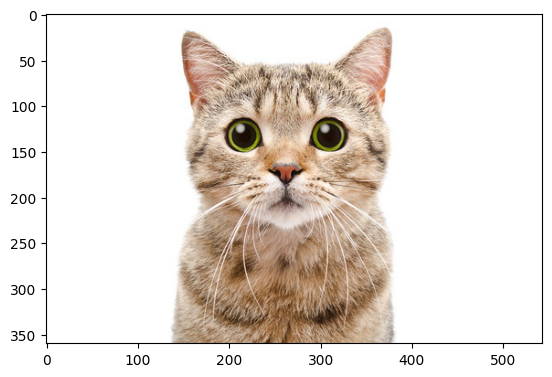

In [26]:
plt.imshow(cat_tensor.permute(1, 2, 0))

In [29]:
type(cat_tensor.numpy())

numpy.ndarray

In [30]:
cat_tensor[0].numpy()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

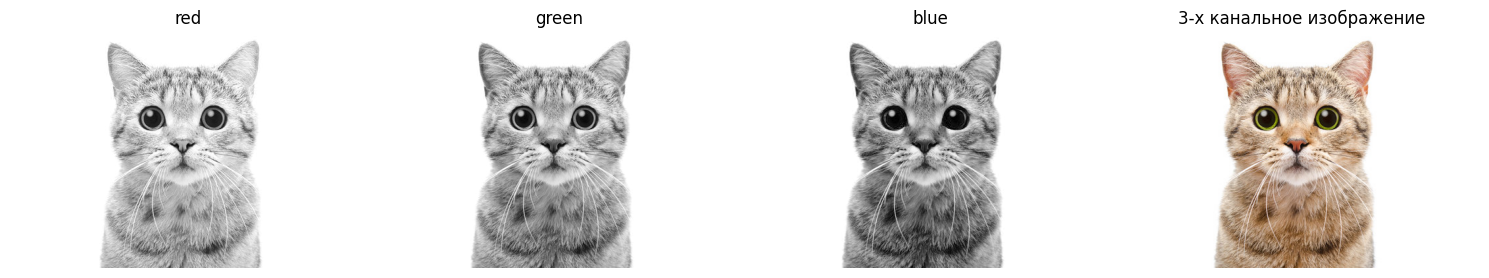

In [31]:
plt.figure(figsize=(15, 5))
colors = ['red', 'green', 'blue']

for ch in range(cat_tensor.shape[0]):
    plt.subplot(1, 4, ch+1)
    plt.title(colors[ch])
    plt.imshow(cat_tensor[ch], cmap='gray')
    plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('3-х канальное изображение')
plt.imshow(cat_tensor.permute(1, 2, 0))
plt.axis('off')

plt.tight_layout()
plt.show()


---

In [32]:
pyth = torchvision.io.read_image('./python_12.png')
pyth_pil = PIL.Image.open('./python_12.png')

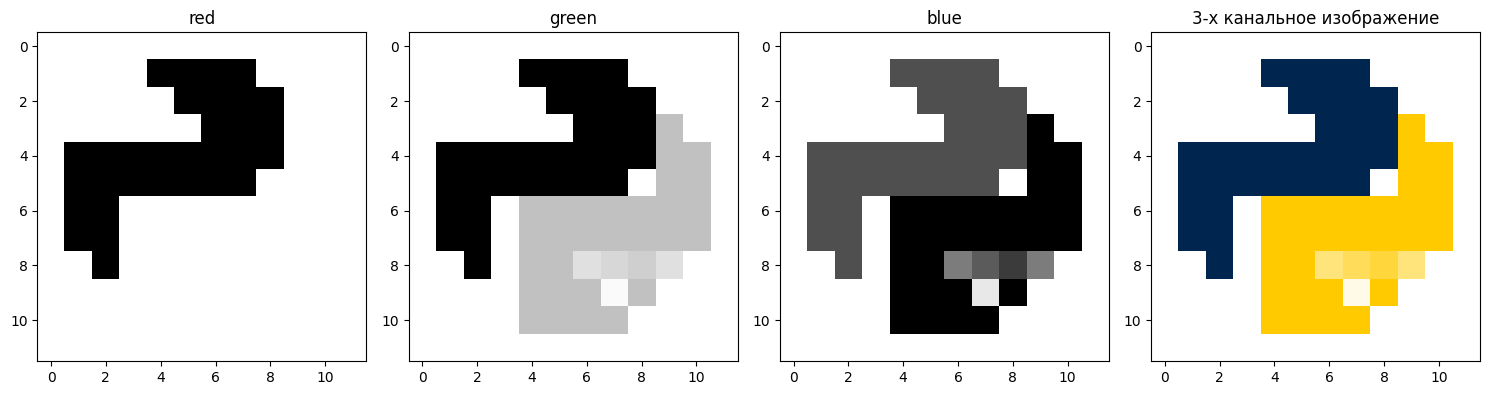

In [34]:
plt.figure(figsize=(15, 5))
colors = ['red', 'green', 'blue']

for ch in range(pyth.shape[0]):
    plt.subplot(1, 4, ch+1)
    plt.title(colors[ch])
    plt.imshow(pyth[ch], cmap='gray')
    # plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('3-х канальное изображение')
plt.imshow(pyth.permute(1, 2, 0))
# plt.axis('off')

plt.tight_layout()
plt.show()


In [37]:
pyth_pil = PIL.Image.open('./python_12.png')

In [38]:
type(pyth_pil)

PIL.PngImagePlugin.PngImageFile

In [43]:
type(pyth_pil.convert('RGB'))

PIL.Image.Image

In [48]:
a = np.array(pyth_pil.convert('RGB'))

In [49]:
a.min(), a.max()

(0, 255)

In [52]:
transformed_to_tensor = transforms.PILToTensor()(pyth_pil)       # PIL Image
transformed_to_tensor.shape, transformed_to_tensor.max()

(torch.Size([3, 12, 12]), tensor(255, dtype=torch.uint8))

In [53]:
# transformed_to_tensor = transforms.PILToTensor()(pyth_pil)       # PIL Image
transformed_to_tensor = transforms.ToTensor()(pyth_pil)       # PIL Image или другой numpy массив
transformed_to_tensor.shape, transformed_to_tensor.dtype, transformed_to_tensor.min(), transformed_to_tensor.max()

(torch.Size([3, 12, 12]), torch.float32, tensor(0.), tensor(1.))

In [ ]:
# (B - batch, C - chanel, H - height, W - width)

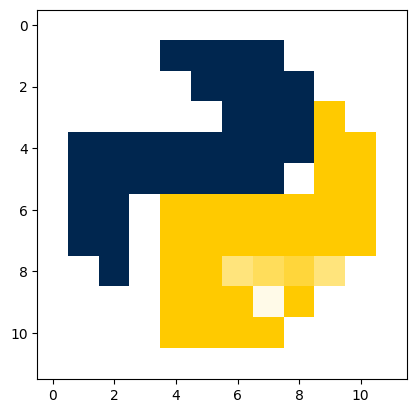

In [54]:
plt.imshow(transformed_to_tensor.permute(1,2,0))

In [57]:
transformed_to_size = transforms.Resize((5, 5), antialias=False)(transformed_to_tensor)

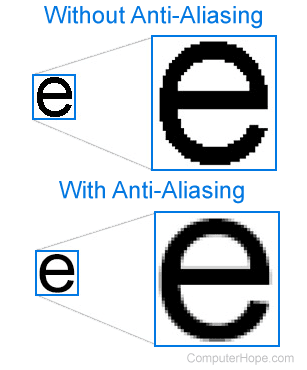

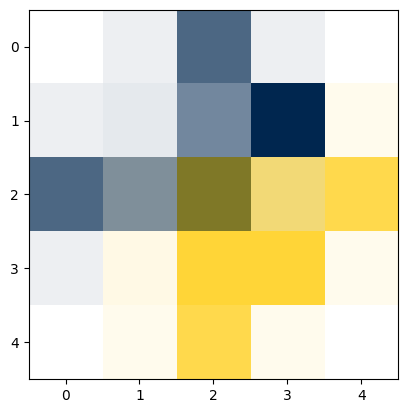

In [58]:
plt.imshow(transformed_to_size.permute(1,2,0))

In [41]:
# my_transform_resize = transforms.Resize((5,5), antialias=True)

In [42]:
# my_transform_resize(transformed_to_tensor)

In [59]:
transformed_to_size

tensor([[[1.0000, 0.9300, 0.3000, 0.9300, 1.0000],
         [0.9300, 0.9000, 0.4500, 0.0000, 1.0000],
         [0.3000, 0.5000, 0.5000, 0.9500, 1.0000],
         [0.9300, 1.0000, 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]],

        [[1.0000, 0.9404, 0.4043, 0.9404, 1.0000],
         [0.9404, 0.9149, 0.5320, 0.1490, 0.9855],
         [0.4043, 0.5641, 0.4706, 0.8535, 0.8545],
         [0.9404, 0.9792, 0.8380, 0.8370, 0.9855],
         [1.0000, 0.9855, 0.8545, 0.9855, 1.0000]],

        [[1.0000, 0.9517, 0.5169, 0.9517, 1.0000],
         [0.9517, 0.9310, 0.6204, 0.3098, 0.9300],
         [0.5169, 0.6049, 0.1549, 0.4655, 0.3000],
         [0.9517, 0.9000, 0.2188, 0.2195, 0.9300],
         [1.0000, 0.9300, 0.3000, 0.9300, 1.0000]]])

In [60]:
# (img - 0.5) / 0.5
transformed_normalized = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(transformed_to_size)

In [61]:
transformed_normalized

tensor([[[ 1.0000,  0.8600, -0.4000,  0.8600,  1.0000],
         [ 0.8600,  0.8000, -0.1000, -1.0000,  1.0000],
         [-0.4000,  0.0000,  0.0000,  0.9000,  1.0000],
         [ 0.8600,  1.0000,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000]],

        [[ 1.0000,  0.8809, -0.1914,  0.8809,  1.0000],
         [ 0.8809,  0.8298,  0.0639, -0.7020,  0.9709],
         [-0.1914,  0.1282, -0.0588,  0.7071,  0.7090],
         [ 0.8809,  0.9584,  0.6761,  0.6740,  0.9709],
         [ 1.0000,  0.9709,  0.7090,  0.9709,  1.0000]],

        [[ 1.0000,  0.9034,  0.0337,  0.9034,  1.0000],
         [ 0.9034,  0.8620,  0.2408, -0.3804,  0.8600],
         [ 0.0337,  0.2098, -0.6902, -0.0690, -0.4000],
         [ 0.9034,  0.8000, -0.5624, -0.5609,  0.8600],
         [ 1.0000,  0.8600, -0.4000,  0.8600,  1.0000]]])

In [62]:
tensor_info(transformed_normalized)

Размер тензора: torch.Size([3, 5, 5])
Тип данных элементов тензора: torch.float32
Максимальный элемент: 1.0
Минимальный элемент: -1.0
Тип данных тензора: <class 'torch.Tensor'>


In [63]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.CenterCrop((3,3))
])


In [64]:
transform(pyth_pil)

tensor([[[-1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000],
         [ 1.0000,  1.0000,  1.0000]],

        [[-0.7020, -0.7020, -0.7020],
         [-0.7020, -0.7020, -0.7020],
         [ 0.5843,  0.5843,  0.5843]],

        [[-0.3804, -0.3804, -0.3804],
         [-0.3804, -0.3804, -0.3804],
         [-1.0000, -1.0000, -1.0000]]])

## 1. Dataset для изображений в PyTorch 

Dataset — это интерфейс для работы с вашими данными. Это могут быть как встроенные датасеты, так и кастомные.

Пример:

- `torch.utils.data.Dataset`


In [65]:
# Импорт необходимых библиотек
import torch
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import matplotlib.pyplot as plt

In [66]:
def tensor_info(tensor):
    print(f'Размер тензора: {tensor.shape}')
    print(f'Тип данных элементов тензора: {tensor.dtype}')
    print(f'Максимальный элемент: {tensor.max()}')
    print(f'Минимальный элемент: {tensor.min()}')
    print(f'Тип данных тензора: {type(tensor)}')

### Трансформации данных `transforms`

In [79]:
# Трансформации данных
transform = transforms.Compose([
    transforms.ToTensor(),          # 0..1
    transforms.Resize((200, 150), antialias=False), # h200, w150 
    transforms.RandomRotation(15),  # random rot -15, +15
    # transforms.CenterCrop(100),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# train_dataset_transformed = datasets.MNIST(root='./data', train=True, transform=transform, download=True)


In [80]:
# https://pytorch.org/vision/master/datasets.html

train_dataset_svhn = datasets.SVHN(root='./data', split='train', download=True)
train_dataset_svhn_tr = datasets.SVHN(root='./data', split='train', transform=transform, download=True)

# ds_food_tr = datasets.Food101(root='./data', split='train', download=True)
# ds_dtd_tr = datasets.DTD(root='./data', split='train', transform=transform, download=False)

Using downloaded and verified file: ./data/train_32x32.mat
Using downloaded and verified file: ./data/train_32x32.mat


In [81]:
print(train_dataset_svhn_tr)            # __repr__

Dataset SVHN
    Number of datapoints: 73257
    Root location: ./data
    Split: train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(200, 150), interpolation=bilinear, max_size=None, antialias=False)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
           )


In [82]:
print(f'Тип данных без обработки: {type(train_dataset_svhn[0][0])}' )
print(f'Тип данных после transform: {type(train_dataset_svhn_tr[0][0])}' )

Тип данных без обработки: <class 'PIL.Image.Image'>
Тип данных после transform: <class 'torch.Tensor'>


In [83]:
train_dataset_svhn[0]

(<PIL.Image.Image image mode=RGB size=32x32>, 1)

In [86]:
train_dataset_svhn_tr[567][0].shape

torch.Size([3, 200, 150])

### * PIL.Image vs torch.Tensor

`PIL.Image` и тензор изображения в PyTorch представляют собой два разных формата для хранения и работы с изображениями. Рассмотрим основные различия:

1. **Формат данных**
   - **PIL.Image**: Изображение хранится в виде объекта из библиотеки Python Imaging Library (PIL), теперь более известной как `Pillow`. Этот формат удобен для работы с изображениями в их обычном виде — можно легко отображать, обрезать или изменять изображения. Изображение представляется как 2D (для grayscale) или 3D массив (для RGB).
   - **Тензор изображения**: В PyTorch изображения хранятся в виде тензоров, которые являются многомерными массивами. Для изображения RGB тензор будет иметь размеры `(C, H, W)`, где `C` — количество каналов (обычно 3 для RGB), `H` — высота изображения, и `W` — ширина.

2. **Размерность и порядок каналов**
   - **PIL.Image**: Размерность изображения в формате `(H, W, C)`, где `H` — высота, `W` — ширина, а `C` — каналы (например, 3 канала для RGB).
   - **Тензор изображения**: Размерность тензора в PyTorch — `(C, H, W)`, где `C` — каналы идут первыми, что является общепринятым форматом для большинства нейросетей.

3. **Тип данных**
   - **PIL.Image**: Изображения в формате `PIL.Image` обычно представлены в виде значений от 0 до 255 для каждого канала (целые числа).
   - **Тензор изображения**: В тензоре изображения значения обычно находятся в диапазоне от 0 до 1 (если нормализованы) или от 0 до 255, но представлены в виде `float32` (с плавающей точкой).

4. **Преобразования**
   - **PIL.Image**: Преобразования можно выполнять с помощью библиотеки `Pillow` или с помощью `torchvision.transforms` (например, изменение размера, повороты, обрезка). Для дальнейшего использования в моделях PyTorch изображение необходимо конвертировать в тензор.
   - **Тензор изображения**: После преобразования в тензор данные уже находятся в удобном формате для вычислений в PyTorch, таких как обучение модели, выполнение обратного распространения и т.д. Для визуализации их можно преобразовать обратно в `PIL.Image`.

5. **Совместимость с моделями**
   - **PIL.Image**: Модели PyTorch не могут напрямую работать с изображениями в формате `PIL.Image`. Сначала изображение должно быть преобразовано в тензор.
   - **Тензор изображения**: Это основной формат, который используется для обучения моделей в PyTorch. Все вычисления (например, вычисление градиентов, обновление весов и т.д.) выполняются на тензорах.

### Сравнение обработанных и необработанных изображений

In [87]:
tensor_info( train_dataset_svhn_tr[0][0] )

Размер тензора: torch.Size([3, 200, 150])
Тип данных элементов тензора: torch.float32
Максимальный элемент: 0.4397568702697754
Минимальный элемент: 0.0
Тип данных тензора: <class 'torch.Tensor'>


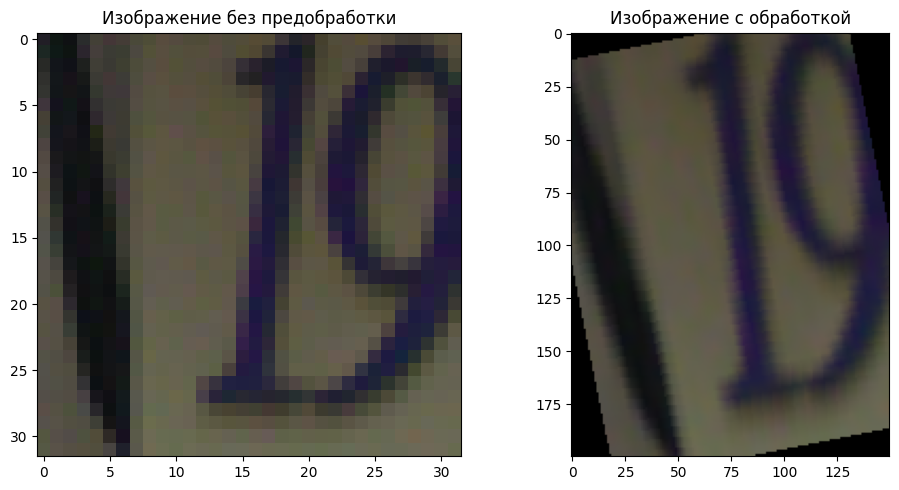

In [88]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Изображение без предобработки')
plt.imshow(train_dataset_svhn[0][0])

plt.subplot(1, 2, 2)
plt.title('Изображение с обработкой')
plt.imshow(train_dataset_svhn_tr[0][0].permute(1, 2, 0))

plt.tight_layout()
plt.show()

In [ ]:
# Примеры с трансформациями
# https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html

### Base classes для датасетов

#### ImageFolder

Класс `ImageFolder` в PyTorch является способом создания датасетов, где данные могут быть организованы в папках по категориям (классам). Основная идея заключается в том, чтобы организовать данные по папкам, где каждая папка соответствует классу данных.

**Организация данных.** Загрузчик данных, в котором изображения по умолчанию расположены следующим образом:

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/[...]/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/[...]/asd932_.png
```

In [89]:
from torchvision.datasets import DatasetFolder, ImageFolder, VisionDataset
from torchvision import transforms
import matplotlib.pyplot as plt

In [90]:
# Трансформации данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256, antialias=False),
    transforms.CenterCrop(256),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [91]:
ds_custom = ImageFolder(root='./data/custom_ds')
ds_custom_tr = ImageFolder(root='./data/custom_ds', transform=transform)

In [ ]:
ds_custom       # __repr__

Dataset ImageFolder
    Number of datapoints: 2600
    Root location: ./data/custom_ds

In [85]:
ds_custom_tr

Dataset ImageFolder
    Number of datapoints: 2600
    Root location: ./data/custom_ds
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=False)
               CenterCrop(size=(256, 256))
           )

In [93]:
print(f'Тип данных без обработки: {type(ds_custom[0][0])}' )
print(f'Тип данных после transform: {type(ds_custom_tr[0][0])}' )

Тип данных без обработки: <class 'PIL.Image.Image'>
Тип данных после transform: <class 'torch.Tensor'>


In [94]:
tensor_info(ds_custom_tr[0][0])

Размер тензора: torch.Size([3, 256, 256])
Тип данных элементов тензора: torch.float32
Максимальный элемент: 1.0
Минимальный элемент: 0.0
Тип данных тензора: <class 'torch.Tensor'>


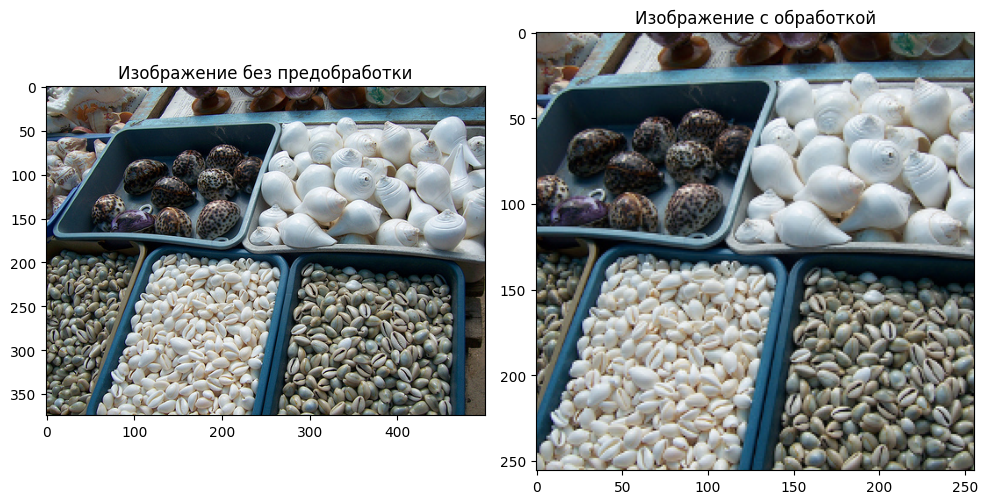

In [95]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Изображение без предобработки')
plt.imshow(ds_custom[1569][0])

plt.subplot(1, 2, 2)
plt.title('Изображение с обработкой')
plt.imshow(ds_custom_tr[1569][0].permute(1, 2, 0))

plt.tight_layout()
plt.show()

In [104]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(256, antialias=False),
    transforms.CenterCrop(128),
    transforms.RandomRotation(30)
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

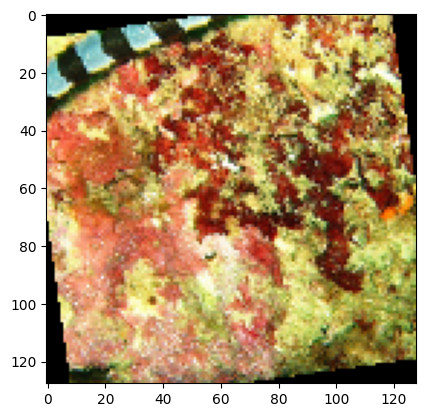

In [109]:
plt.imshow(transform(ds_custom[0][0]).permute(1,2,0))

#### DatasetFolder

Класс `DatasetFolder` в PyTorch является универсальным способом создания датасетов, где данные могут быть организованы в папках по категориям. Он похож на `ImageFolder`, но более гибкий — вы можете загружать данные любых типов, а не только изображения. Основная идея заключается в том, чтобы организовать данные по папкам, где каждая папка соответствует классу данных, а затем использовать кастомную функцию для загрузки файлов.

**Организация данных**. Все файлы, относящиеся к одному классу, находятся в одной папке. Например:
```
/path/to/data
├── class1
│   ├── file1.ext
│   ├── file2.ext
├── class2
│   ├── file3.ext
│   ├── file4.ext
```

In [ ]:
# Пример реализации `DatasetFolder`
from torchvision.datasets import DatasetFolder
from torchvision import transforms
# from torchaudio import transforms
from PIL import Image

In [ ]:
# Функция загрузки файлов (в данном случае изображений)
def default_loader(path):
    return Image.open(path).convert('RGB')

# Преобразования для изображений (например, изменение размера, нормализация)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Создаем DatasetFolder
dataset = DatasetFolder(
    root='./data/custom_ds',  # Путь к корневой директории с папками классов
    loader=default_loader,  # Функция загрузки файла
    extensions=('jpg', 'jpeg', 'png'),  # Список разрешенных расширений файлов
    transform=transform  # Преобразования для изображений
)


Преимущества `DatasetFolder`:
- Гибкость: можно использовать для любых типов данных (изображения, аудио, текст и т.д.).
- Поддержка произвольных форматов данных, если предоставлена правильная функция загрузки.
  
Таким образом, `DatasetFolder` — это универсальный инструмент для создания кастомных датасетов, где данные могут быть организованы по папкам, а также для поддержки произвольных типов данных.


### Самый "кастомный" подход

Создание собственного датасета в `torchvision` — это удобный способ подготовки данных для обучения нейронных сетей в PyTorch. `torchvision.datasets` предлагает возможность работать с кастомными данными через класс `Dataset`. Мы можем наследовать его и определить собственные методы для загрузки и обработки данных.

Шаги создания собственного датасета:
1. **Наследование от `torch.utils.data.Dataset`**: Этот класс требует переопределить три метода:
   - `__init__`: Инициализация, где можно указать путь к данным, сделать предобработку.
   - `__len__`: Возвращает количество элементов в датасете.
   - `__getitem__`: Возвращает один образец данных с индексом.

2. **Опционально: Применение трансформаций** с помощью `torchvision.transforms`, таких как изменение размера, нормализация и т.д.

In [111]:
import os
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Инициализация датасета.
        
        Args:
            root_dir (str): Корневая директория, содержащая папки с изображениями.
            transform (callable, optional): Трансформации, которые будут применяться к изображениям.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        
        # Создание списка путей к изображениям и меток (название папки как класс)
        self.classes = sorted(os.listdir(root_dir))  # предполагается, что имена папок — классы
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        
        for class_name in self.classes:
            class_folder = os.path.join(root_dir, class_name)
            for image_name in os.listdir(class_folder):
                image_path = os.path.join(class_folder, image_name)
                self.image_paths.append(image_path)
                self.labels.append(self.class_to_idx[class_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        """
        Возвращает изображение и его метку по индексу.
        
        Args:
            idx (int): Индекс изображения.
        
        Returns:
            image (Tensor): Тензор изображения.
            label (int): Метка класса изображения.
        """
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")  # Открываем изображение как RGB
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label



In [122]:
# Путь к директории с изображениями
ds_directory = "./data/custom_ds"

# Применение трансформаций (например, изменение размера, нормализация)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128, 128), antialias=False),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomRotation(10)
])

# Создаем экземпляр кастомного датасета
dataset = CustomImageDataset(root_dir=ds_directory, transform=transform)

In [114]:
type(dataset)

__main__.CustomImageDataset

In [118]:
len(dataset), dataset[0][0].shape, dataset[0][1]

(2600, torch.Size([3, 128, 128]), 0)

In [119]:
dataset.classes

['n01751748', 'n01943899']

Описание:
1. **Корневая директория** `root_dir` содержит папки (например, `bird_01`, `bird_02` и т.д.), каждая из которых содержит изображения для соответствующего класса.
2. Для каждой папки:
   - Папка распознаётся как класс.
   - Все изображения внутри папки связываются с этим классом.
3. Преобразования к изображениям, такие как изменение размера и преобразование в тензор, выполняются через `transforms`.

Этот код создает датасет, совместимый с `DataLoader` PyTorch, что позволяет загружать изображения пакетами для обучения нейронных сетей.

In [123]:
import torch

### Датасеты для данных в виде тензоров

In [ ]:
# Создаем пример данных
data = torch.randn(100, 3, 28, 28)  # 100 изображений 28x28 с 3 каналами
labels = torch.randint(0, 10, (100,))  # Метки от 0 до 9


100


In [125]:
data.shape, labels.shape

(torch.Size([100, 3, 28, 28]), torch.Size([100]))

In [126]:
dataset = torch.utils.data.TensorDataset(data, labels)
print(len(dataset))


100


In [127]:
# Пример кастомного Dataset
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Создаем пример данных
data = torch.randn(100, 3, 28, 28)  # 100 изображений 28x28 с 3 каналами
labels = torch.randint(0, 10, (100,))  # Метки от 0 до 9

# Создание Dataset и DataLoader
custom_dataset = CustomDataset(data, labels)


## 2. Dataset для аудиоданных в PyTorch 

В PyTorch есть библиотека **torchaudio**, которая предоставляет готовые датасеты для работы с аудио. 

Пример использования одного из таких готовых датасетов — **"SpeechCommands"**, содержащего команды на английском языке. Ниже приведён пример того, как можно загрузить и использовать этот аудио-датасет:

### Загрузка готовых датасетов

In [128]:
# Пример использования `SpeechCommands` в `torchaudio`
import torch
import torchaudio
from torch.utils.data import DataLoader
from torchaudio.datasets import SPEECHCOMMANDS
import torchaudio.transforms as transforms

In [130]:
# Путь к директории, где будет сохранён датасет (если не существует, скачает автоматически)
dataset_path = './data'

# Создание датасета SpeechCommands
train_dataset = SPEECHCOMMANDS(root=dataset_path, download=True, subset='training')


In [131]:
len(train_dataset)

84843

In [133]:
train_dataset[0]

(tensor([[-0.0658, -0.0709, -0.0753,  ..., -0.0700, -0.0731, -0.0704]]),
 16000,
 'backward',
 '0165e0e8',
 0)

In [134]:
train_dataset[0][0].shape

torch.Size([1, 16000])

In [136]:
import IPython
IPython.display.Audio(train_dataset[45][0], rate=16000)


In [109]:
# Трансформации для аудио
# https://pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html

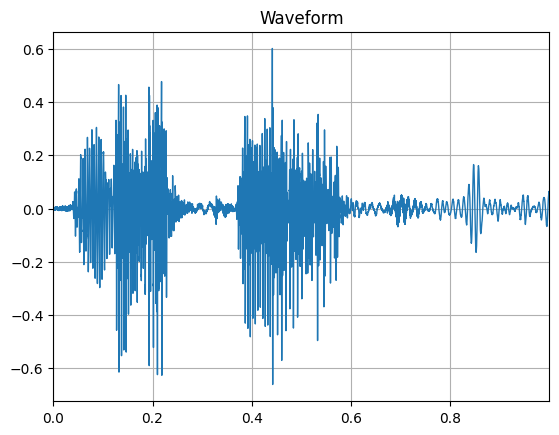

In [138]:
def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)
    
plot_waveform(train_dataset[45][0], 16000)

In [139]:
yesno_dataset = torchaudio.datasets.YESNO(root=dataset_path, download=True)
# Пример получения одного аудиофайла и его метки
waveform, sample_rate, label = yesno_dataset[0]
print(f"Waveform shape: {waveform.shape}, Sample rate: {sample_rate}, Label: {label}")

Waveform shape: torch.Size([1, 50800]), Sample rate: 8000, Label: [0, 0, 0, 0, 1, 1, 1, 1]


Другие готовые аудио-датасеты:
- **LIBRISPEECH** — датасет для распознавания речи.
- **YESNO** — простой датасет с голосовыми командами "yes" и "no".
- **GTZAN** — популярный датасет для классификации жанров музыки.


Эти датасеты полезны для задач классификации аудио, распознавания речи, а также других задач, связанных с анализом звуковых сигналов.

### Загрузка собственного датасета


Пример для аудиофайлов:

Допустим, вы работаете с аудиофайлами в формате `.wav`. В этом случае вам потребуется изменить `loader` на функцию, которая загружает аудиоданные, например, с помощью библиотеки `torchaudio`.


In [141]:
import torchaudio

# Функция загрузки аудиофайлов
def audio_loader(path):
    waveform, sample_rate = torchaudio.load(path)
    return waveform

# Создание DatasetFolder для аудиофайлов
audio_dataset = DatasetFolder(
    root='./data/SpeechCommands/speech_commands_v0.02',
    loader=audio_loader,
    extensions=('wav',),  # Только аудиофайлы формата .wav
    # transform=None
)


In [142]:
audio_dataset[11]

(tensor([[-9.1553e-05, -2.7466e-04, -3.9673e-04,  ...,  1.5259e-04,
           3.6621e-04,  3.3569e-04]]),
 1)

### ** При наличии .csv разметок

In [114]:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
# Создаем пример данных
data = torch.randn(1000, 3, 28, 28)  # 100 изображений 28x28 с 3 каналами
labels = torch.randint(0, 10, (1000,))  # Метки от 0 до 9

dataset = torch.utils.data.TensorDataset(data, labels)
print(len(dataset))

1000


## 3. DataLoader для данных в PyTorch

DataLoader — итератор, который позволяет загружать данные из Dataset батчами, что важно для обучения моделей.


- `torch.utils.data.DataLoader`

In [143]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

### Основные параметры

Основные параметры `DataLoader` и их влияние:

1. **`dataset`**
   - **Описание**: Объект класса `Dataset`, который предоставляет данные для загрузки. Это может быть как стандартный датасет из библиотеки `torchvision`, так и кастомный класс, реализующий методы `__getitem__` и `__len__`.


In [144]:
loader = DataLoader(dataset, batch_size=32)

2. **`batch_size`**
   - **Описание**: Количество примеров, которые будут загружаться за одну итерацию. 
   - **Влияние**: 
     - Больший размер батча требует больше памяти, но может ускорить обучение за счет использования параллельной обработки.
     - Меньший размер батча экономит память, но обучение может быть медленнее.


In [119]:
loader = DataLoader(dataset, batch_size=64)

3. **`shuffle`**
   - **Описание**: Если параметр установлен в `True`, то данные будут перемешиваться перед каждой эпохой обучения.
   - **Влияние**:
     - Перемешивание данных помогает избежать переобучения, поскольку модель видит данные в случайном порядке.
     - Часто используется для обучения, но для тестового набора данных обычно не требуется.


In [120]:
loader = DataLoader(dataset, batch_size=32, shuffle=True)

4. **`num_workers`**
   - **Описание**: Число потоков (workers), которые будут использоваться для загрузки данных.
   - **Влияние**:
     - Увеличение этого числа может повысить производительность за счет параллельной загрузки данных, особенно на больших датасетах.
     - Для малых наборов данных увеличение числа потоков может не дать значимого прироста.
     - Оптимальное значение обычно зависит от архитектуры процессора и GPU.



In [121]:
loader = DataLoader(dataset, batch_size=32, num_workers=4)

5. **`drop_last`**
   - **Описание**: Если `True`, то последний неполный батч будет отброшен, если количество данных не делится на размер батча.
   - **Влияние**:
     - Используется, чтобы все батчи были одинакового размера, что может быть полезно в некоторых случаях (например, если сеть ожидает фиксированный размер входа).


In [ ]:
loader = DataLoader(dataset, batch_size=32, drop_last=True)

6. **`collate_fn`**
   - **Описание**: Функция, которая объединяет список примеров в батч. По умолчанию используется функция, которая превращает списки тензоров в батчи (например, просто объединяя их по оси).
   - **Влияние**:
     - Полезно при работе с нерегулярными данными (например, текст разной длины) или при необходимости выполнить специфические преобразования при загрузке данных.



In [52]:
def custom_collate_fn(batch):
    # пользовательская логика для объединения примеров
    return torch.stack(batch, dim=0)

loader = DataLoader(dataset, batch_size=32, collate_fn=custom_collate_fn)

### *Доп. параметры

---

7. **`sampler`**
   - **Описание**: Определяет стратегию выбора данных. По умолчанию это равномерная выборка (`RandomSampler`), но можно задать собственную стратегию.
   - **Влияние**:
     - Использование кастомных семплеров может быть полезно, когда нужно реализовать сложные стратегии выборки (например, стратифицированная выборка или взвешенная выборка).



In [145]:
from torch.utils.data import WeightedRandomSampler

# Веса для каждого элемента в датасете
weights = [0.1, 0.5, 0.4]  
sampler = WeightedRandomSampler(weights, len(weights))
loader = DataLoader(dataset, batch_size=32, sampler=sampler)

8. **`pin_memory`**
   - **Описание**: Если `True`, то тензоры будут скопированы в зафиксированную (pinned) память, что ускоряет передачу данных на GPU.
   - **Влияние**:
     - Это может улучшить производительность при использовании GPU, особенно при больших батчах данных.


In [146]:
loader = DataLoader(dataset, batch_size=32, pin_memory=True)

9. **`worker_init_fn`**
   - **Описание**: Функция для инициализации каждого потока `worker`. Это может быть полезно, если нужно задать какой-то конкретный случайный seed для каждого потока.
   - **Влияние**:
     - Используется для контроля над инициализацией потоков, особенно в случае, если важен процесс генерации случайных чисел.


In [147]:
import numpy as np

def worker_init_fn(worker_id):
    np.random.seed(42 + worker_id)

loader = DataLoader(dataset, batch_size=32, num_workers=4, worker_init_fn=worker_init_fn)

In [1]:
# Пример использования DataLoader:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# Загрузка датасета MNIST
train_dataset = MNIST(root='data', train=True, transform=ToTensor(), download=True)


In [4]:
# Создание DataLoader с выбранными параметрами
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=128, 
                          shuffle=True, 
                          num_workers=4, 
                          pin_memory=True
                          )

# Пример прохода по данным
for images, labels in train_loader:
    print(images.shape)  # Размер батча
    print(labels.shape)
    break


torch.Size([128, 1, 28, 28])
torch.Size([128])


In [5]:
next(iter(train_loader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

`DataLoader` в PyTorch предлагает широкий набор параметров, которые можно настроить для оптимальной загрузки данных в зависимости от конкретной задачи. Выбор значений параметров зависит от размера датасета, типа задачи, доступных вычислительных ресурсов и характеристик данных.

## Appendix

In [66]:
import torchaudio
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import DatasetFolder
import torch.nn.functional as F

# Функция загрузки аудиофайлов
def audio_loader(path):
    waveform, sample_rate = torchaudio.load(path)
    return waveform

# Создание DatasetFolder для аудиофайлов
audio_dataset = DatasetFolder(
    root='./data/SpeechCommands/speech_commands_v0.02',
    loader=audio_loader,
    extensions=('wav',),  # Только аудиофайлы формата .wav
)

In [67]:
# Функция для приведения аудиофайлов к одной длине (padding)
def collate_fn(batch):
    # Находим максимальную длину аудиофайла в текущем батче
    max_len = max([waveform.size(1) for waveform, label in batch])
    
    # Приведение всех аудиофайлов к одной длине (с помощью padding)
    padded_waveforms = [F.pad(waveform, (0, max_len - waveform.size(1))) for waveform, label in batch]
    
    # Формирование батча: объединяем аудиоданные и метки
    waveforms = torch.stack(padded_waveforms)
    labels = torch.tensor([label for _, label in batch])
    
    return waveforms, labels

# Пример использования DataLoader с collate_fn
audio_dataloader = DataLoader(audio_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)

# Пример цикла по данным
for audio_data, labels in audio_dataloader:
    print(f"Batch audio data size: {audio_data.size()}, Labels: {labels}")
    break


Batch audio data size: torch.Size([16, 1, 16000]), Labels: tensor([19, 13, 26, 14, 10,  3,  6,  1, 20, 33, 21, 22, 27,  6, 17, 26])


In [68]:
# Импорт необходимых библиотек
import torch
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

Batch of X: torch.Size([32, 1]), Batch of Y: torch.Size([32, 1])


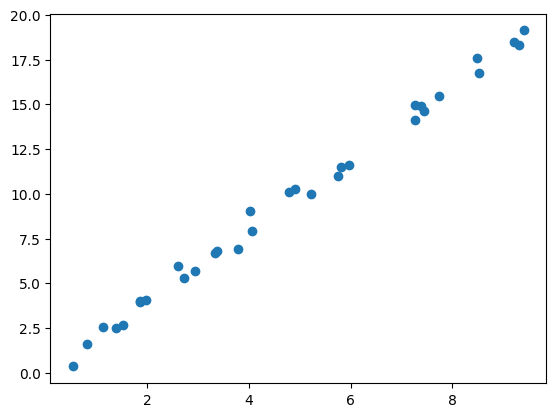

In [ ]:
# 3.2 Регрессия: синтетические данные
import numpy as np

class RegressionDataset(Dataset):
    def __init__(self, n_samples=1000):
        np.random.seed(0)
        self.x = np.random.rand(n_samples, 1) * 10  # случайные данные
        self.y = 2 * self.x + np.random.randn(n_samples, 1) * 0.5  # линейная зависимость с шумом
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return torch.tensor(self.x[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

# Создаем датасет и загружаем данные
regression_dataset = RegressionDataset()
regression_loader = DataLoader(regression_dataset, batch_size=32, shuffle=True)

# Проверим один батч
for batch_x, batch_y in regression_loader:
    print(f"Batch of X: {batch_x.size()}, Batch of Y: {batch_y.size()}")
    plt.scatter(batch_x, batch_y)
    break

